In [72]:
import numpy as np
import pandas as pd
from pyparsing import line
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as stats

In [73]:
import src.Teleconnection.spatial_pattern as ssp
import src.Teleconnection.pattern_statistic as sps
import src.Teleconnection.index_statistic as sis
import src.plots.eof_plots as sept
import src.Teleconnection.temporal_index as sti

In [74]:
import src.composite.composite as scp


In [75]:
import importlib
importlib.reload(sis)
importlib.reload(sti)
importlib.reload(ssp)
importlib.reload(sept)
importlib.reload(sps)

<module 'src.Teleconnection.pattern_statistic' from '/work/mh0033/m300883/3rdPanel/src/Teleconnection/pattern_statistic.py'>

# Data

In [76]:

all_all_dep = xr.open_dataset('/work/mh0033/m300883/3rdPanel/data/indexDiffPattern/all_all_dep.nc').pc
all_first_dep = xr.open_dataset('/work/mh0033/m300883/3rdPanel/data/indexDiffPattern/all_frist_dep.nc').pc
all_last_dep = xr.open_dataset('/work/mh0033/m300883/3rdPanel/data/indexDiffPattern/all_last_dep.nc').pc


In [77]:
## seasonal data
allens = xr.open_dataset(
    "/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc"
)
splitens = ssp.split_ens(allens)
# demean ens-meancomposite
demean = splitens - splitens.mean(dim="ens")
# select traposphere
trop = demean.sel(hlayers=slice(20000, 100000))
trop = trop.var156
# standardize
trop_std = ssp.standardize(trop)

# extreme counts

In [78]:
dep_first10_exc,dep_last10_exc = sis.extreme_count([all_all_dep,all_first_dep,all_last_dep])

In [79]:
dep_extc = sis.extr_count_df(dep_first10_exc,dep_last10_exc)

In [80]:
dep_extc

pattern   period  extreme_counts
extr_type mode hlayers                                  
pos       NAO  20000.0      all  first10              18
               20000.0      all   last10              33
               20000.0    first  first10              11
               20000.0    first   last10              20
               20000.0     last  first10              27
...                         ...      ...             ...
neg       EA   100000.0     all   last10              30
               100000.0   first  first10              14
               100000.0   first   last10              16
               100000.0    last  first10              30
               100000.0    last   last10              36

[264 rows x 3 columns]

In [81]:
ea = dep_extc.xs('EA',level='mode')

# All

In [82]:

## dependent
all_all_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/allPattern/dep_index_nonstd.nc"
).pc
changing_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_index_nonstd.nc"
).pc
all_all_dep = all_all_dep.transpose("time", "ens", "mode", "hlayers")

# standardization

mean_dep = all_all_dep.mean(dim="time")
std_dep = all_all_dep.std(dim="time")
dep_std = (changing_dep - mean_dep) / std_dep

In [83]:
dep_std

<xarray.DataArray 'pc' (time: 139, hlayers: 11, ens: 100, mode: 2)>
array([[[[ 0.78393485,  1.15900145],
         [-0.04171056, -0.11058199],
         [-0.41391823, -0.67055103],
         ...,
         [-1.87711898,  1.0794701 ],
         [-0.88806669,  0.59205738],
         [-0.91297063, -0.28590394]],

        [[ 0.73382407,  1.15807327],
         [-0.07244583, -0.05009351],
         [-0.35795773, -0.66177345],
         ...,
         [-2.08043336,  1.20079337],
         [-0.85286169,  0.74542105],
         [-0.83083722, -0.33557859]],

        [[ 0.70791149,  1.17705832],
         [-0.09335304, -0.03023669],
         [-0.33203033, -0.6840185 ],
         ...,
...
         ...,
         [-0.53589989, -0.20781448],
         [-0.66314154, -0.55827348],
         [-1.42169629, -1.82063401]],

        [[ 0.4353762 ,  0.19046393],
         [ 1.12726303,  1.52628142],
         [-1.6320938 , -1.80175596],
         ...,
         [-0.54893541, -0.14287657],
         [-0.68961767, -0.5987562 ],
         [-1.44368544, -2.07636671]],

        [[ 0.44357419,  0.22806948],
         [ 1.12764353,  1.54391719],
         [-1.62133674, -1.82717962],
         ...,
         [-0.54283532, -0.04375711],
         [-0.69931821, -0.59648802],
         [-1.46029428, -2.25954208]]]])
Coordinates:
  * time     (time) object 1856-03-03 23:52:00 ... 1994-03-16 11:52:00
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * mode     (mode) object 'NAO' 'EA'

In [84]:
dep_counts_all = scp.composite(dep_std, trop_std, reduction="count")

In [85]:
dep_counts_all

<xarray.DataArray 'pc' (mode: 2, hlayers: 11, extr_type: 2)>
array([[[324, 303],
        [316, 324],
        [303, 336],
        [281, 346],
        [267, 356],
        [242, 376],
        [234, 387],
        [225, 398],
        [220, 385],
        [222, 390],
        [218, 389]],

       [[340, 356],
        [324, 346],
        [310, 352],
        [289, 365],
        [271, 358],
        [279, 374],
        [276, 379],
        [271, 380],
        [267, 385],
        [263, 393],
        [260, 399]]])
Coordinates:
  * hlayers    (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode       (mode) object 'NAO' 'EA'
  * extr_type  (extr_type) <U3 'pos' 'neg'

In [86]:
ea_all = dep_counts_all.sel(mode = 'EA')

In [87]:
ea_all

<xarray.DataArray 'pc' (hlayers: 11, extr_type: 2)>
array([[340, 356],
       [324, 346],
       [310, 352],
       [289, 365],
       [271, 358],
       [279, 374],
       [276, 379],
       [271, 380],
       [267, 385],
       [263, 393],
       [260, 399]])
Coordinates:
  * hlayers    (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
    mode       <U2 'EA'
  * extr_type  (extr_type) <U3 'pos' 'neg'

In [88]:
all_pos = ea_all.sel(extr_type = 'pos').values

In [89]:
all_neg = ea_all.sel(extr_type = 'neg').values

In [90]:
hlayers = ((ea_all.hlayers.values)/100).astype(int)

(1000.0, 200.0)

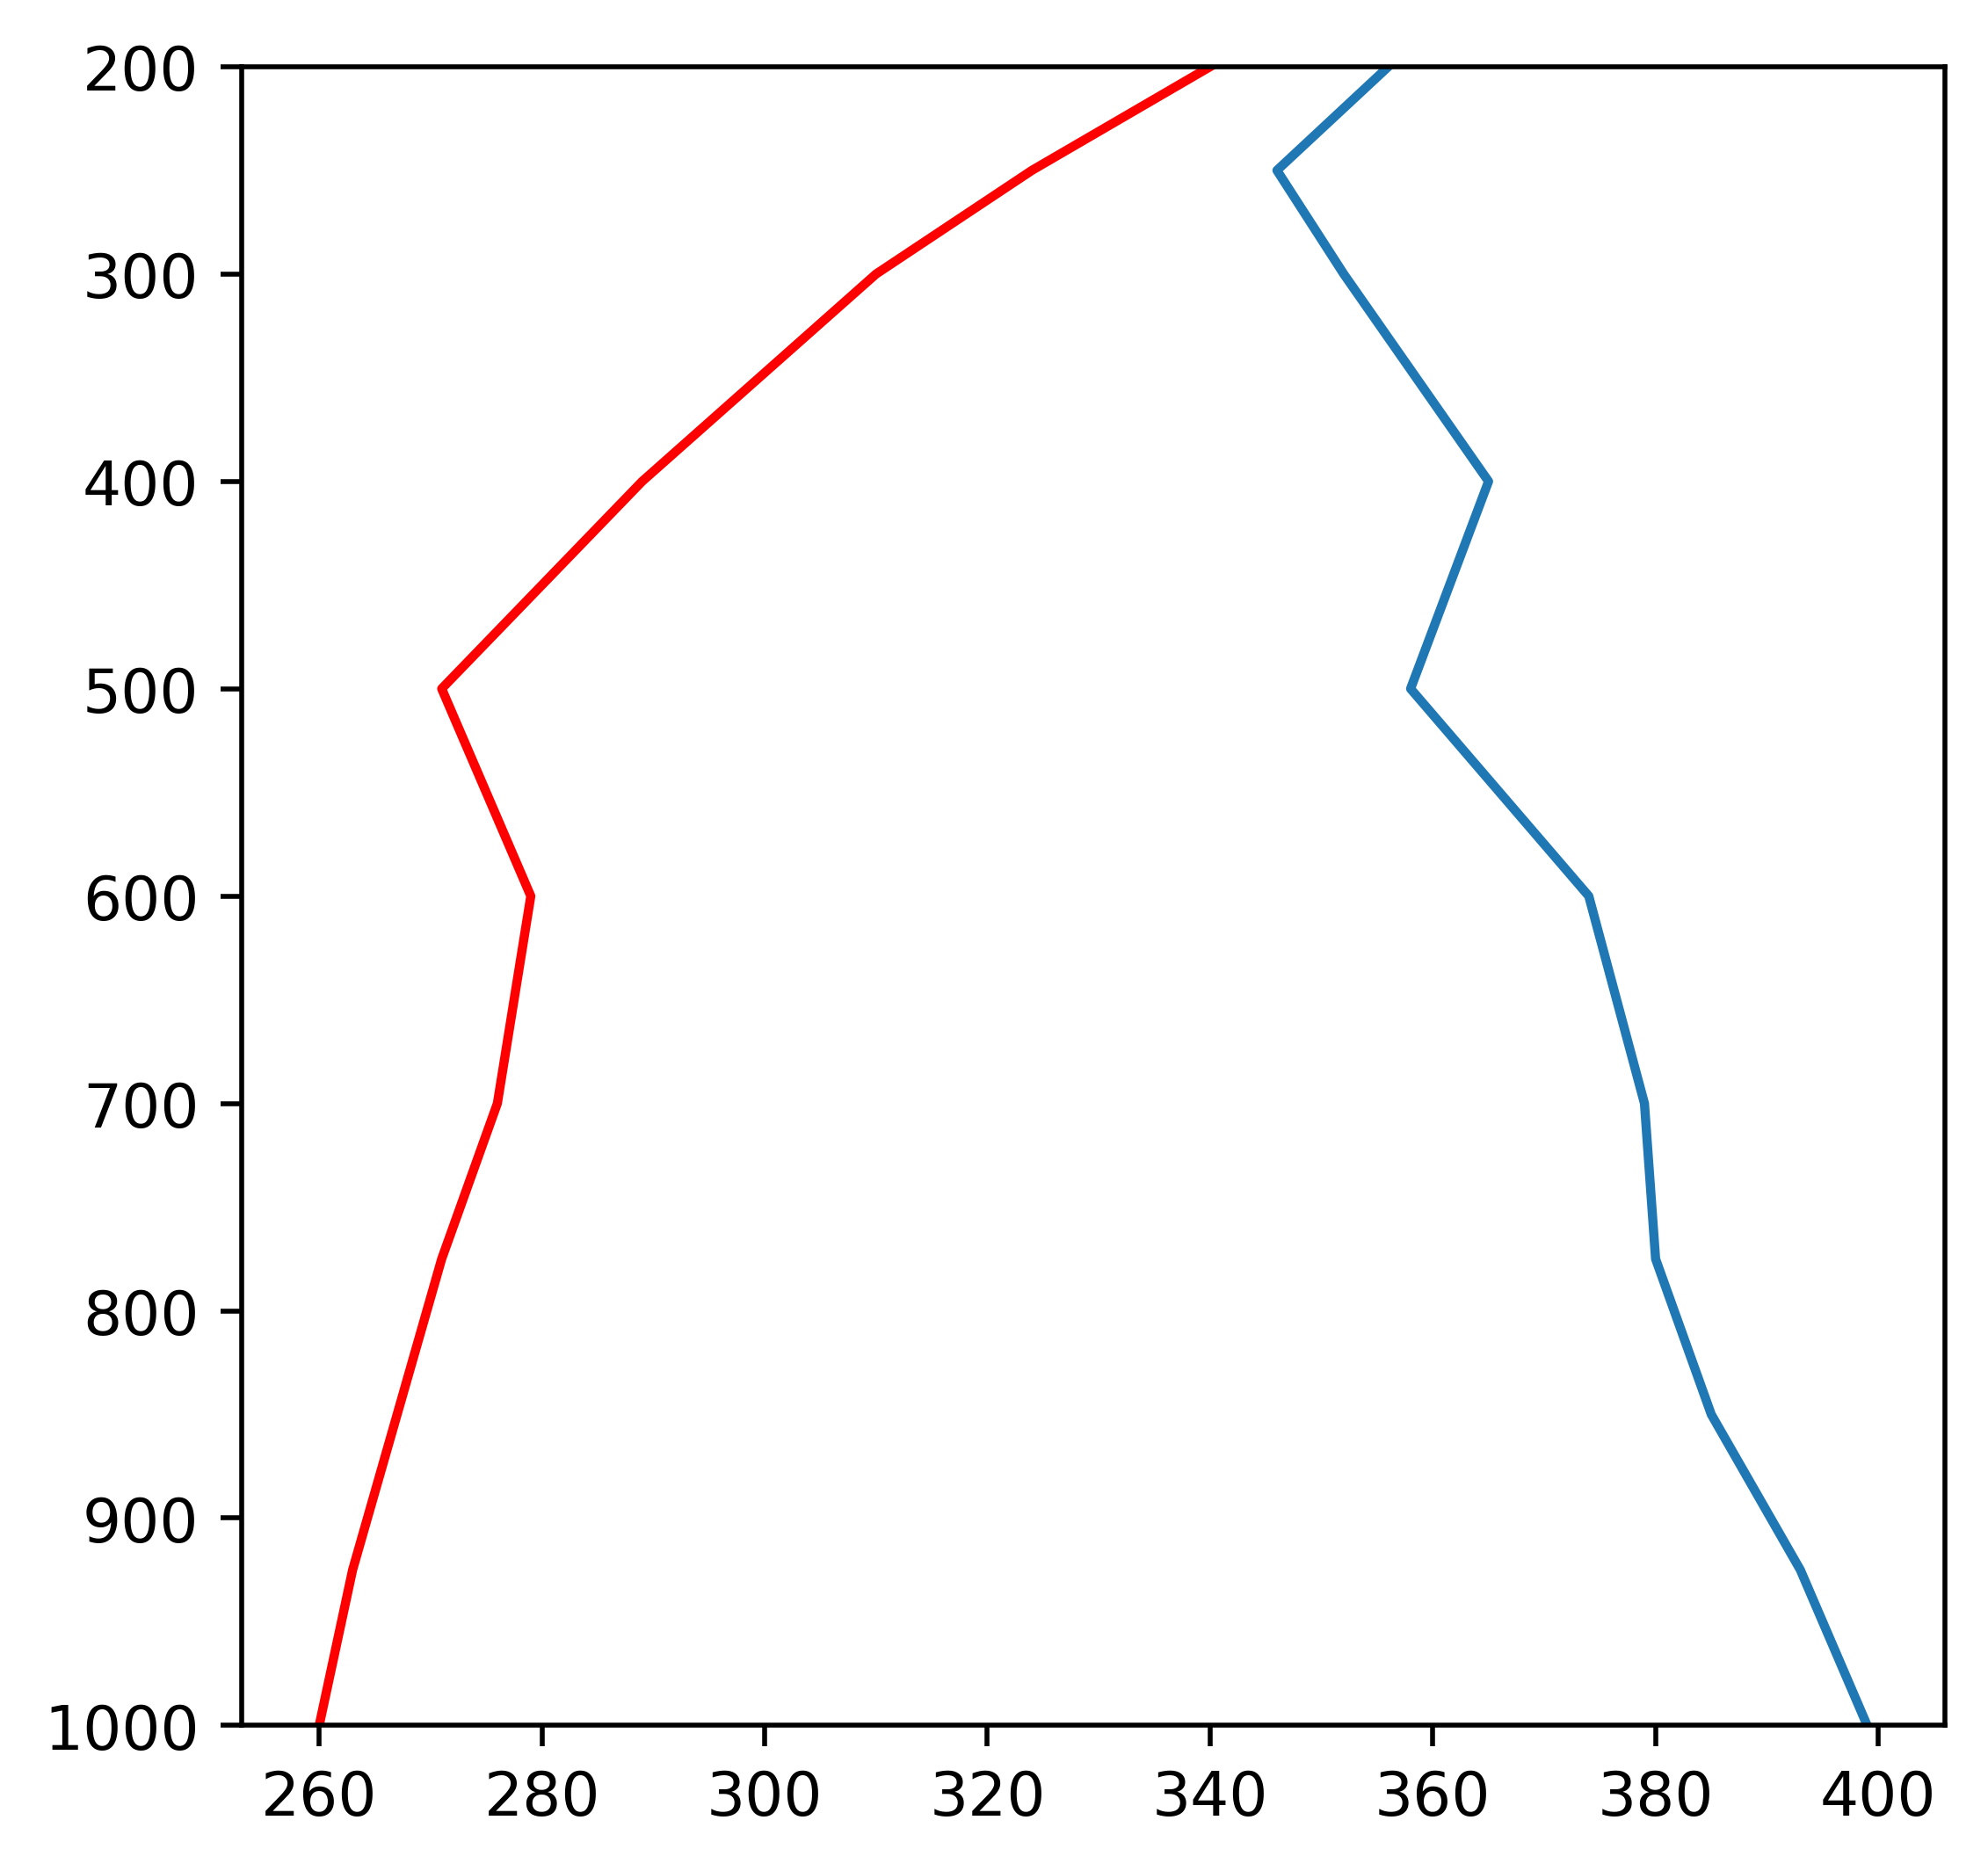

In [91]:
fig,ax = plt.subplots(figsize = (5,5),dpi = 500)
ax.plot(all_pos,hlayers,c = 'r')
ax.plot(all_neg,hlayers, c='#1f77b4')
ax.set_ylim(1000,200)

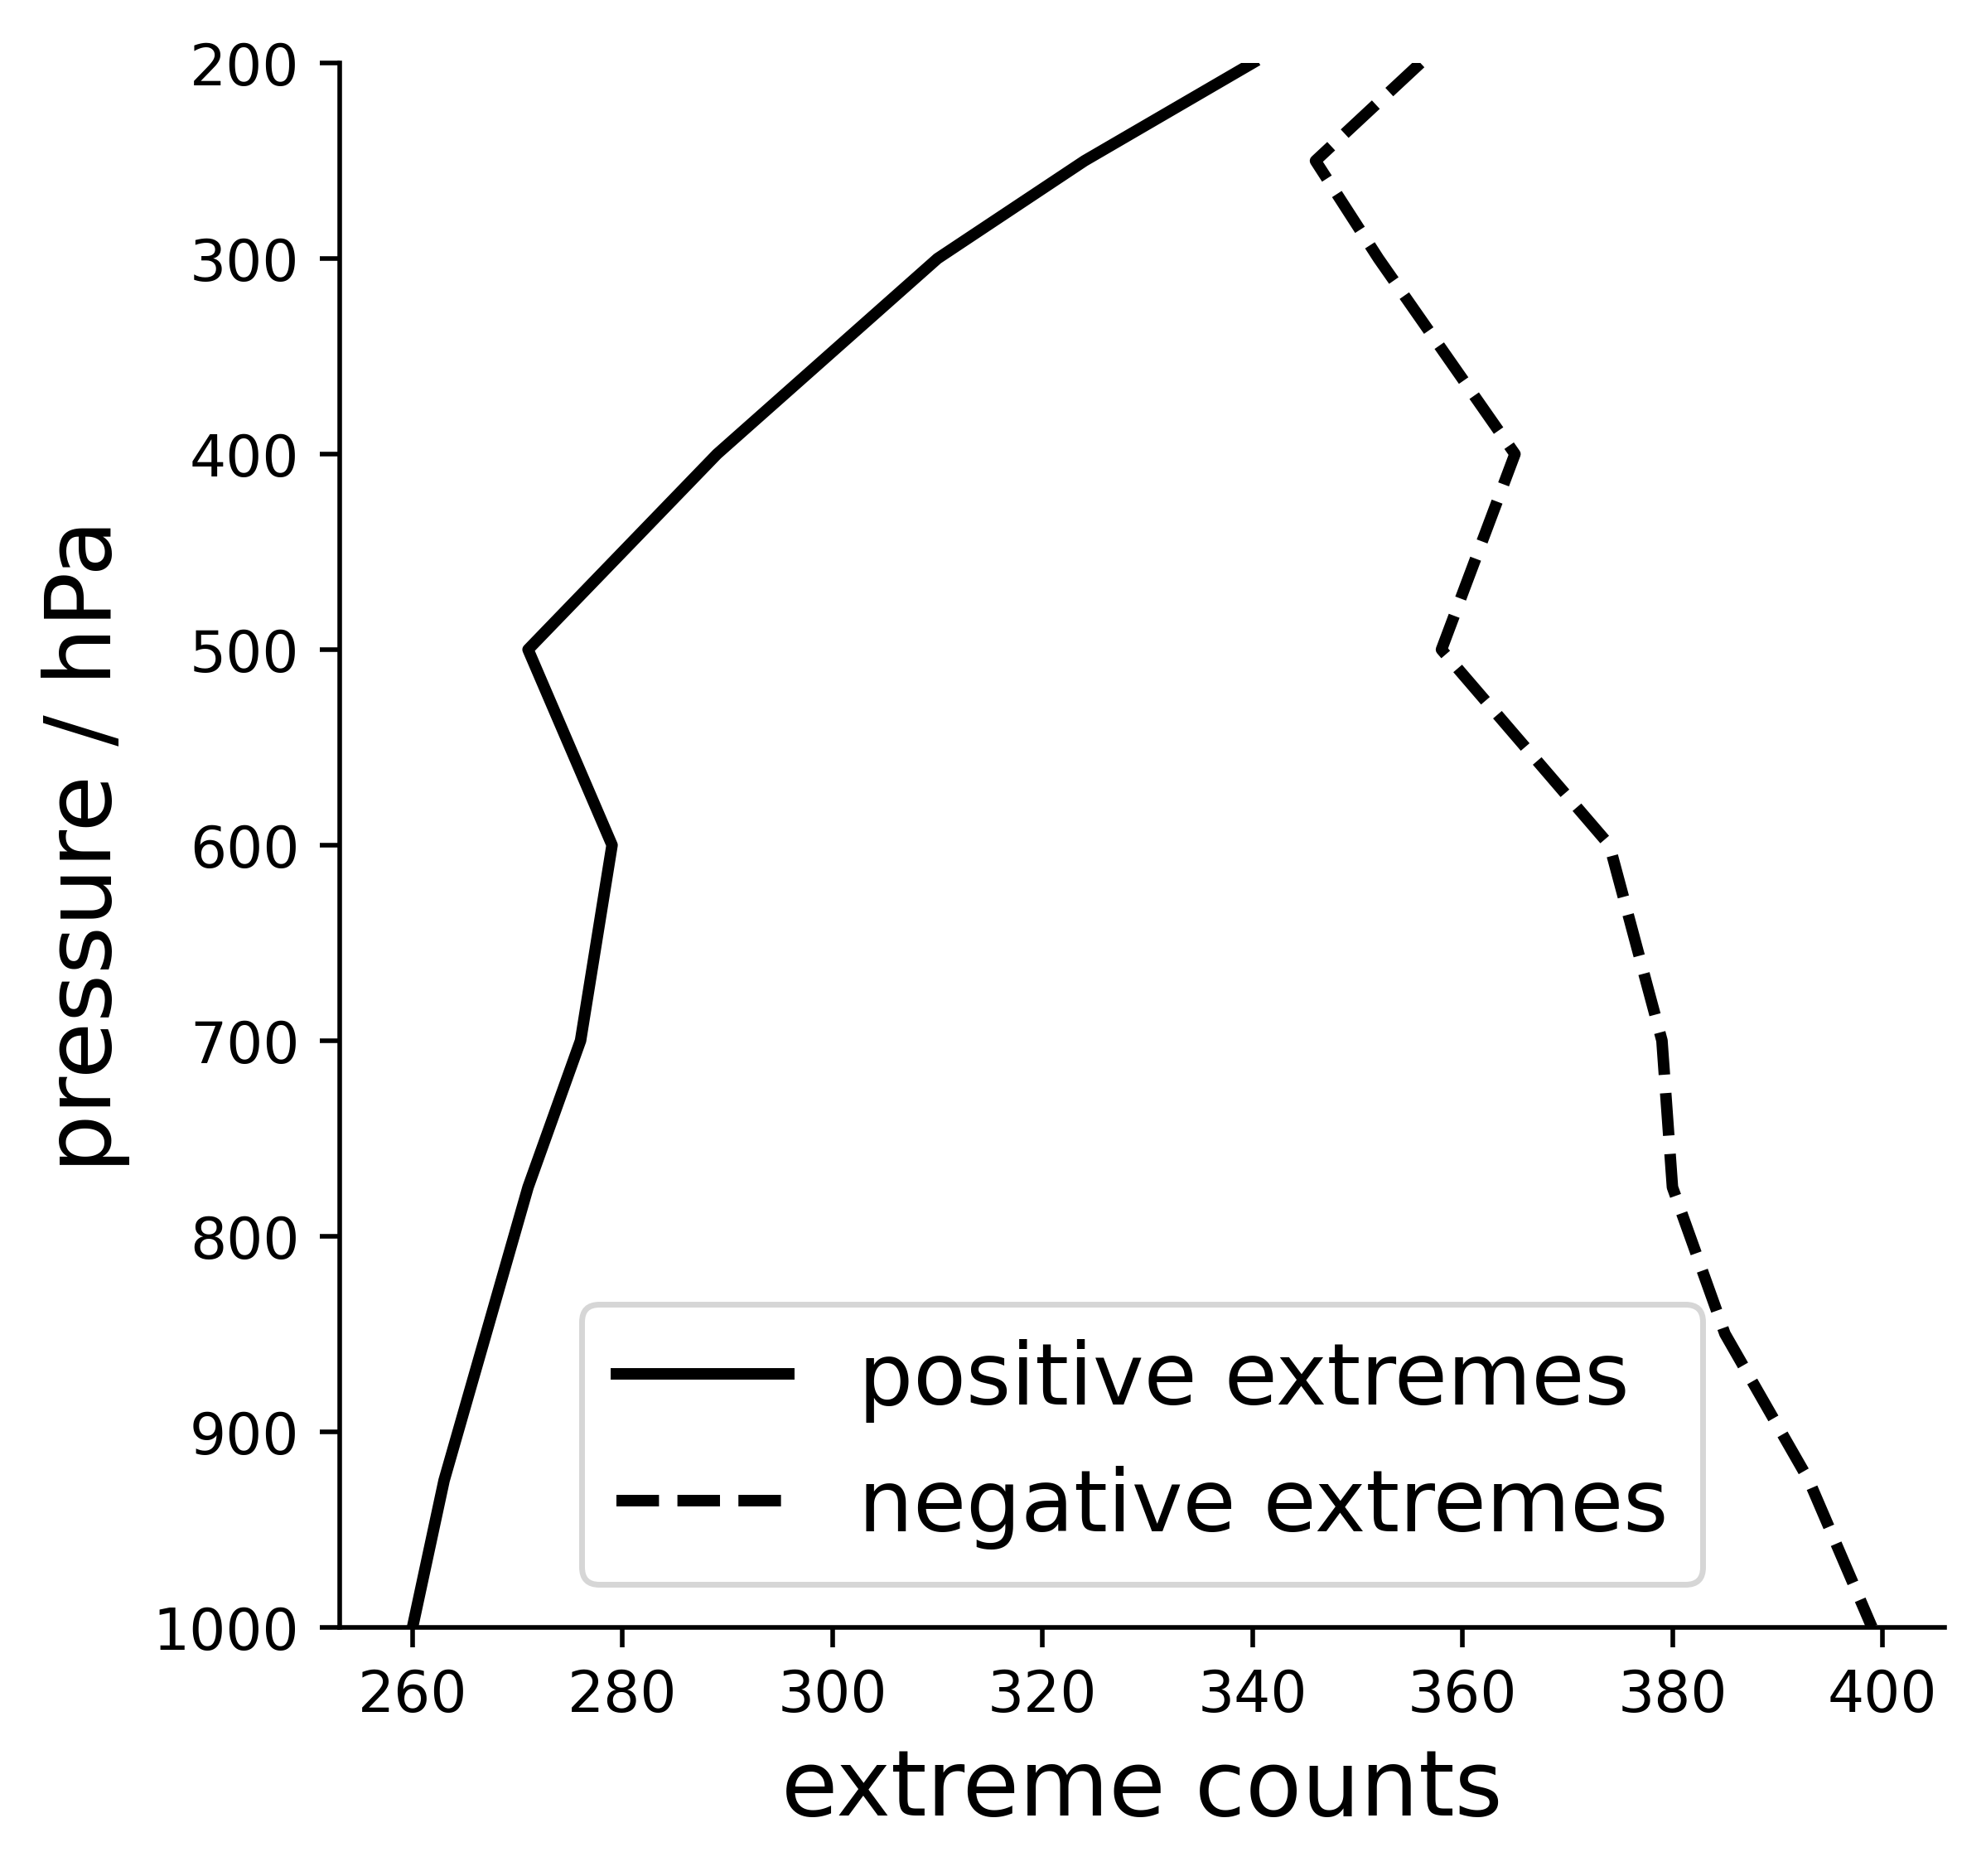

In [93]:
fig,ax = plt.subplots(figsize = (5,5),dpi = 500)
ax.plot(all_pos,hlayers,c = 'k',label = 'positive extremes',linewidth = 2)
# ax.plot(all_neg,hlayers, c='#1f77b4')
ax.plot(all_neg,hlayers, 'k--',label = 'negative extremes',linewidth = 2)

ax.set_ylim(1000,200)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

ax.set_ylabel('pressure / hPa',fontsize = 16)
ax.set_xlabel("extreme counts",fontsize = 16)

# ax.set_title('counts of extremes for East Atlantic (EA)')
ax.legend(fontsize = 15)


# first and last10

In [30]:
ea_first = ea[(ea['pattern']=='first' )& (ea['period']=='first10')]

In [28]:
ea_last = ea[(ea['pattern']=='last' )& (ea['period']=='last10')]

In [32]:
ea_first

pattern   period  extreme_counts
extr_type hlayers                                  
pos       20000.0    first  first10              12
          25000.0    first  first10              12
          30000.0    first  first10              14
          40000.0    first  first10              16
          50000.0    first  first10              20
          60000.0    first  first10              21
          70000.0    first  first10              19
          77500.0    first  first10              19
          85000.0    first  first10              20
          92500.0    first  first10              17
          100000.0   first  first10              16
neg       20000.0    first  first10               4
          25000.0    first  first10               6
          30000.0    first  first10               7
          40000.0    first  first10               8
          50000.0    first  first10               9
          60000.0    first  first10              11
          70000.0    first  first10              13
          77500.0    first  first10              14
          85000.0    first  first10              14
          92500.0    first  first10              16
          100000.0   first  first10              14